In [20]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import sys
from PIL import Image
import math as m




def createArray(iterations,coordinatesArray,transformationArray):
	count=0
	iteration=0
	while(1):
		if (iteration==iterations-1):
			break
		transformationArray[0][iteration]=coordinatesArray[count]
		count +=1
		iteration +=1
		if count==len(coordinatesArray):
			count =0

	iteration2=0

	count2=0
	count3 =0

	while(1):
		if (iteration2 ==iterations-1):
			break
		transformationArray[1][iteration2] = coordinatesArray[count2]
		iteration2+=1
		count3+=1
		if (count3==len(coordinatesArray)):
			count3=0
			count2+=1
			if(count2==len(coordinatesArray)):
				count2=0
	for i in range(iterations-1):
		transformationArray[2][i]=1
	return transformationArray

def createFinalImage(n,final,transformationArray,img):
	for i in range(len(final[0])):
		newX =int((final[0][i]))
		newY =int((final[1][i]))

		oldX = int((transformationArray[0][i]))
		oldY = int((transformationArray[1][i]))

		n[newX %101][newY%101] = img[oldX][oldY]
	return n

def NearestNeighbourInterpolation(inputImage,outputImage,arg1,arg2,arg3,arg4,arg5,arg6):
	imageToOpen = inputImage #The input image we need to process

	img = np.array(Image.open(imageToOpen))
	imageInfo = img.shape

	heigth = imageInfo[0]
	width = imageInfo[1]

	iterations = heigth*width

	coordinatesArray =np.zeros(heigth-1) #This array contains the values needed to place
	start = -(heigth//2)				 #the X and Y axis on the center of the image

	for i in range(heigth-1):
		coordinatesArray[i]=start	     #Its values are [-(heigth)/2:(heigth)/2]
		start+=1						 #Those are the values needed for the creation of the
										 # 3 X (heigth*width) array that contains the coordinates of each pixel
										 #In the image

	transformationArray = np.zeros((3,iterations-1)) 

	transformationArray = createArray(iterations,coordinatesArray,transformationArray) #The 3 X (heigth*width) array that is created using 
										#createArray() function, whose implemenation is above

	a = np.zeros(6,dtype='float')

	a[0] = float(arg1)
	a[1] = float(arg2) 
	a[2] = float(arg3)		
	a[3] = float(arg4)  	
	a[4] = float(arg5)
	a[5] = float(arg6)

	affine =[[a[0],a[1],a[2]], #At this point, the affine matrix is initialized
			 [a[3],a[4],a[5]], #using the values that the user gives as an input
			 [0,0,1]]

	final = np.dot(affine,transformationArray) #The coordinates that are formed by multiplying
										 #the affine matrix with the original image
	n = np.zeros((heigth,width), dtype ='float')
	newImage = np.zeros((heigth,width), dtype ='float')
	newImage = createFinalImage(n,final,transformationArray,img) #The image that is formed by placing the pixels of the original
								   #image on the new coordinates that the multiplication gives

	#For the purpose of using the Nearest Neighbour Interpolation algorithm
	#I create an image whose pixels are assigned to the value (-1)

	sample = np.zeros((heigth,width),dtype='float')
	for i in range(heigth):
		for j in range(width): 
			sample[i][j]=-1

	#Then i do sampling to the image that is formed by the multiplication with the affine matrix
	for i in range(0,heigth,2):
		for j in range(0,width,2):
			sample[i][j]=newImage[i][j]

	neighbours = np.zeros(4,dtype = 'float') #The neighbours for each known pixel in the new
											 #image
	distances = np.zeros(4, dtype = 'int')   #The distance of each neighbour from the current
											 #pixel 

	for i in range(0,heigth):
		for j in range(0,width):
			if (sample[i][j]==-1): #For each unknown pixel we check around it for the values
								   #Of its known neihbours
				#The following cases check if the neibour is not out of bounds
				#and if it is the upper,down, left or right neibour of the current pixel

				#The possible neighbours are kept
				#and their distances from the current pixel as well
				if (i-1>=0):
					neighbours[0] = newImage[i-1][j]
					distances[0] = m.sqrt(m.pow(i-1,2) + m.pow(j,2))
				if (j-1>=0):
					neighbours[1] = newImage[i][j-1]
					distances[1] = m.sqrt(m.pow(i,2) + m.pow(j-1,2))
				if (i+1<=heigth-1):
					neighbours[2] = newImage[i+1][j]
					distances[2] = m.sqrt(m.pow(i-1,2) + m.pow(j,2))
				if (j+1<=heigth-1):

					neighbours[3] = newImage[i][j+1]
					distances[3] = m.sqrt(m.pow(i-1,2) + m.pow(j,2))

				#Next we need to calculate which neighbour has the minimum distance for 
				#the current pixel

				minDistance = distances[0]
				equalDistances =[] #In case we have a tie in the minimum distance, we need to
								   #to know which distances tie
				equalDistances.append(0) #This list serves the purpose described above

				maxColour = neighbours[0]#In case of distance tie, we take the one whose
										 #pixel has the highest intesity
				for k in range(1,4):
					if distances[k]> minDistance:
						continue
					elif distances[k]<minDistance:
							minDistance = distances[k]
					else:
						equalDistances.append(k)

				for equal in equalDistances:
					if (neighbours[equal]>maxColour):
						maxColour = neighbours[equal]
				sample[i][j]=maxColour
				
	#outputFile = argumentsList[2]
	#Image.fromarray(sample).save(outputFile)
	plt.imshow(sample,cmap='gray')
	plt.show()

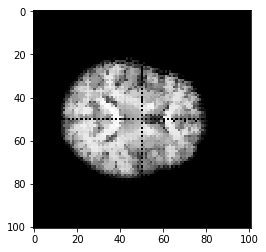

In [19]:
NearestNeighbourInterpolation("brain0030slice150_101x101.png","brain.png",1,0,0,0,1,0)

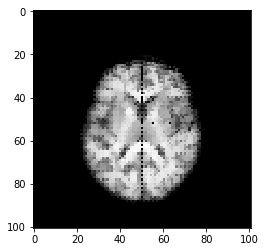

In [4]:
NearestNeighbourInterpolation("brain0030slice150_101x101.png","brain.png",0,-1,0,1,0,0)

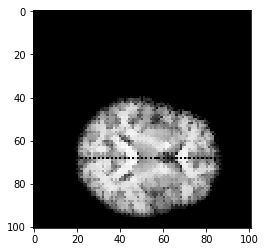

In [22]:
NearestNeighbourInterpolation("brain0030slice150_101x101.png","brain.png",1,0,18,0,1,7)

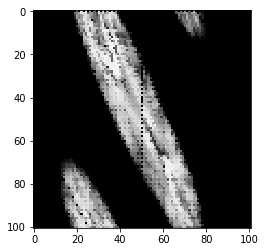

In [18]:
NearestNeighbourInterpolation("brain0030slice150_101x101.png","brain.png",1,2,0,0,1,0)

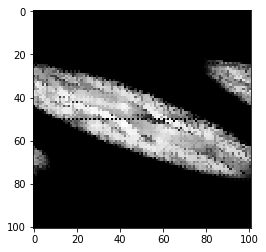

In [15]:
NearestNeighbourInterpolation("brain0030slice150_101x101.png","brain.png",1,0,0,2,1,0)